# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout     # Dropout inactivate some neurons on the network

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

# %run nonlinear_function.py
from nonlinear_function import * # or the above code it's the same

# training data
perc_train = 0.8    # 80% of data in the training set

The dimension of a sample is L = 2
[-31.60811883 -29.54397214] 0
[6.77250291 9.5544703 ] 1
[46.45145197 15.31770969] 1
[24.89066375 15.35698709] 0
[24.77148093 46.13067361] 1
data: 4000
train: 3200


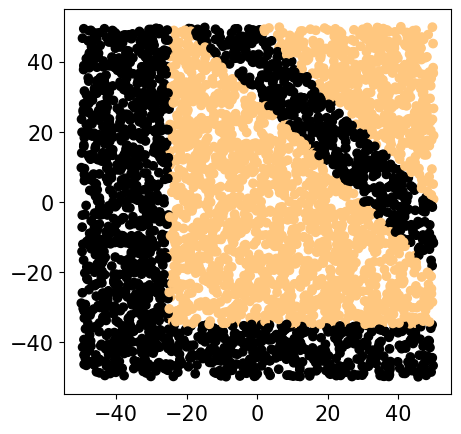

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ', dtype=int)
N = len(x)

# dim. of a sample
L = len(x[0])
print(f"The dimension of a sample is L = {L}")

for i in range(5):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))
# Here we are not considering the test set

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50     # 50 because the above box is between [-40, 40] so dividing by 50 we set the data around 0 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [5]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))                    # the Dropout is added only to the previous layer
    model.add(Dense(1,activation='sigmoid'))    # 1 to have one single output
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu')) 
    # one layer less than the previous method 
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable pa

### Optimization method and cost function

In [6]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training: CASE = 1

In [7]:
fit = model.fit(x_train, y_train,
               epochs=nepoch, batch_size=50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6906 - accuracy: 0.5728 - val_loss: 0.6830 - val_accuracy: 0.6313 - 1s/epoch - 22ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6741 - accuracy: 0.6372 - val_loss: 0.6585 - val_accuracy: 0.6363 - 321ms/epoch - 5ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6498 - accuracy: 0.6547 - val_loss: 0.6350 - val_accuracy: 0.6700 - 330ms/epoch - 5ms/step
Epoch 4/400
64/64 - 0s - loss: 0.6053 - accuracy: 0.7166 - val_loss: 0.5881 - val_accuracy: 0.7025 - 325ms/epoch - 5ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5561 - accuracy: 0.7381 - val_loss: 0.5544 - val_accuracy: 0.7163 - 326ms/epoch - 5ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5285 - accuracy: 0.7437 - val_loss: 0.5244 - val_accuracy: 0.7337 - 329ms/epoch - 5ms/step
Epoch 7/400
64/64 - 0s - loss: 0.5079 - accuracy: 0.7516 - val_loss: 0.4988 - val_accuracy: 0.7613 - 319ms/epoch - 5ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4956 - accuracy: 0.7547 - val_loss: 0.4862 - val_accuracy: 0.7663 - 319ms/epoch - 5ms/step
Epoch 9/40

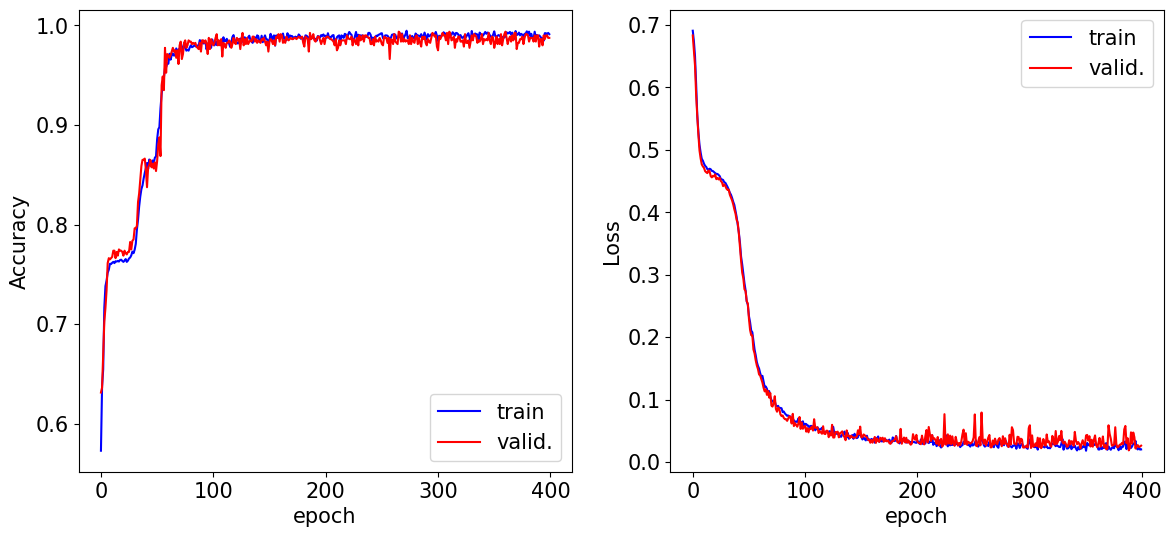

In [8]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.show()

In [9]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 1s 5ms/step


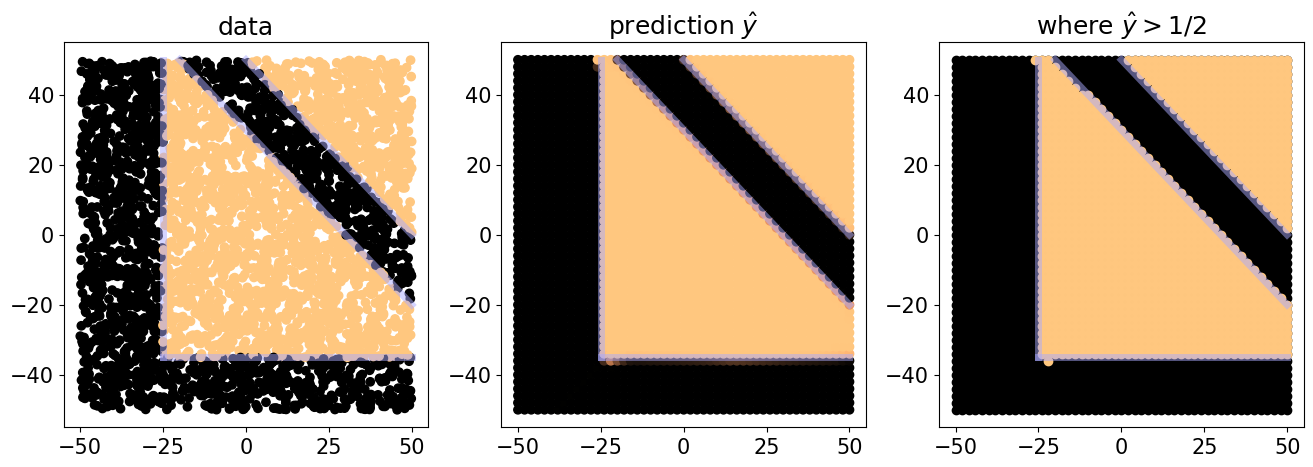

In [10]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
    
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show()